In [1]:
#pretrain MODEL
import torch
from models.transformer.transformer import Transformer  # 替换为你的模型模块路径
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 创建模型实例
d_model = 64
seed = 42
max_len = 2000
pad_idx = 1
bos_len = 3
learning_rate = 1e-2
n_epochs = 200
batch_size = 100
out_fall_name = 'JHHN2'
Rainfall_intensity = 10
pre_model = Transformer(src_len_max=max_len, trg_len_max=max_len, src_pad_idx=pad_idx, trg_pad_idx=pad_idx, d_src=1, d_trg=1, d_model=d_model, trg_size=1).to(device)

# 加载完整 checkpoint
model_path = "./runs/PRET_ml_2000_padidx_1_bos_len_3_lr_0.001_epochs_200_d_model_64_of_JHHN2_RI_10/(max_nse)_11_0.6584107279777527.pkl"
pre_model.load_state_dict(torch.load(model_path))

C:\Users\34938\AppData\Local\Temp\ipykernel_36564\4249095365.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pre_model.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [2]:
# TD MODEL
from models.transformer.transformer import Transformer  # 替换为你的模型模块路径
from data.dataset import DT_Dataset
from pathlib import Path
from utils.lr_strategies import SchedulerFactory
from utils.load_full_checkpoint import load_full_checkpoint
import torch
DS = DT_Dataset
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 创建模型实例
d_model = 64
max_len = 2000
pad_idx = 1
learning_rate = 1e-2
n_epochs = 200
TD_model = Transformer(src_len_max=max_len, trg_len_max=max_len, src_pad_idx=pad_idx, trg_pad_idx=pad_idx, d_src=1, d_trg=1, d_model=d_model, trg_size=1).to(device)
optimizer = torch.optim.Adam(TD_model.parameters(), lr=learning_rate)
scheduler_paras = {"scheduler_type": "warm_up", "warm_up_epochs": n_epochs * 0.25, "decay_rate": 0.99}
scheduler = SchedulerFactory.get_scheduler(optimizer, **scheduler_paras)
# 加载完整 checkpoint
checkpoint_path = "./runs/TD_ml_2000_padidx_1_bos_len_3_lr_0.01_epochs_500_d_model_64_of_JHHHHC_RI_NONE_LF_MIXED_DATASET_ALL/best_(max_nse)_290_0.0536.pt"
load_info = load_full_checkpoint(checkpoint_path, TD_model, optimizer, scheduler, device)

In [3]:
#FINE_TUNE_METHOD_2
from models.transformer.transformer import Transformer  # 替换为你的模型模块路径
from data.dataset import DT_Dataset
from pathlib import Path
from utils.lr_strategies import SchedulerFactory
from utils.load_full_checkpoint import load_full_checkpoint
import torch
DS = DT_Dataset
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 创建模型实例
d_model = 64
max_len = 2000
pad_idx = 1
learning_rate = 1e-2
n_epochs = 200
FT_model = Transformer(src_len_max=max_len, trg_len_max=max_len, src_pad_idx=pad_idx, trg_pad_idx=pad_idx, d_src=1, d_trg=1, d_model=d_model, trg_size=1).to(device)
optimizer = torch.optim.Adam(FT_model.parameters(), lr=learning_rate)
scheduler_paras = {"scheduler_type": "warm_up", "warm_up_epochs": n_epochs * 0.25, "decay_rate": 0.99}
scheduler = SchedulerFactory.get_scheduler(optimizer, **scheduler_paras)
# 加载完整 checkpoint
checkpoint_path = "./runs/FINETUNE_ml_2000_padidx_1_bos_len_3_lr_0.01_epochs_500_d_model_64_of_JHHHHC_RI_NONE_LF_MIXED_DATASET_ALL_FINETUNEMETHOD_0/best_(min_mse)_94_0.0049.pt"
load_info = load_full_checkpoint(checkpoint_path, FT_model, optimizer, scheduler, device)

In [4]:
# DATASET_MIXED MODEL
from models.transformer.transformer import Transformer  # 替换为你的模型模块路径
from data.dataset import DT_Dataset
from pathlib import Path
from utils.lr_strategies import SchedulerFactory
from utils.load_full_checkpoint import load_full_checkpoint
import torch
DS = DT_Dataset
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 创建模型实例
d_model = 64
max_len = 2000
pad_idx = 1
learning_rate = 1e-2
n_epochs = 200
MIXED_model = Transformer(src_len_max=max_len, trg_len_max=max_len, src_pad_idx=pad_idx, trg_pad_idx=pad_idx, d_src=1, d_trg=1, d_model=d_model, trg_size=1).to(device)
optimizer = torch.optim.Adam(MIXED_model.parameters(), lr=learning_rate)
scheduler_paras = {"scheduler_type": "warm_up", "warm_up_epochs": n_epochs * 0.25, "decay_rate": 0.99}
scheduler = SchedulerFactory.get_scheduler(optimizer, **scheduler_paras)
# 加载完整 checkpoint
checkpoint_path = "./runs/TD_ml_2000_padidx_1_bos_len_3_lr_0.01_epochs_500_d_model_64_of_JHHN2_RI_NONE_LF_loss_func_NZ_DATASET_f/best_(max_nse)_77_0.0406.pt"
load_info = load_full_checkpoint(checkpoint_path, MIXED_model, optimizer, scheduler, device)

In [5]:
from torch import nn
from utils.metrics import calc_nse_torch
import torch
from data.dataset import pre_train_Dataset, pre_val_Dataset
from torch.utils.data import DataLoader
from utils.collate_fn import collate_fn
#3nd DATASET INCLUDE ALL DATA
from data.dataset import DT_Dataset_all
from torch.utils.data import DataLoader
from utils.collate_fn import collate_fn
# _________dataset________
out_fall_name = 'JHHHHC'
max_patience = 12
batch_size = 100
# ds_train = DT_Dataset_all(outfall_name = out_fall_name,max_patience=max_patience)
# train_loader = DataLoader(dataset=ds_train, batch_size=batch_size, shuffle=False,collate_fn=collate_fn)
ds_val = DT_Dataset_all(outfall_name = out_fall_name,max_patience=max_patience,type='val')
val_loader = DataLoader(dataset=ds_val, batch_size=batch_size, shuffle=False,collate_fn=collate_fn)

流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13步未恢复
流量恢复超时: 13

In [6]:
# INF PRE
# set model to eval mode (important for dropout)
pre_model.eval()
bos_len = 3
with torch.no_grad():
    batch_idx = 3  # 想要访问的批次索引
    for i, (x_seq, y_seq, real_data) in enumerate(val_loader):
        if i == batch_idx:
            # 处理数据
            break
    #y_seq做了padding
    if x_seq.ndim == 2:
        x_seq = x_seq.unsqueeze(-1)
    if y_seq.ndim == 2:
        y_seq = y_seq.unsqueeze(-1)
    if real_data.ndim == 2:
        real_data = real_data.unsqueeze(-1)
    x_seq, y_seq, real_data = x_seq.to(device), y_seq.to(device),real_data.to(device)
    enc_inputs = x_seq
    batch_size = y_seq.size(0)
    trg_len = y_seq.size(1)
    n_labels = y_seq.size(2)
    dec_inputs = torch.zeros((batch_size, trg_len,n_labels)).to(device)
    dec_inputs[:,:bos_len,:] = y_seq[:,:bos_len,:]

    # get model predictions
    for i in range(bos_len, trg_len):
        decoder_predict = pre_model(enc_inputs, dec_inputs)
        dec_inputs[:, i, :] = decoder_predict[:, i - 1, :]
    y_hat_PRE = dec_inputs[:, :, :]
    y_truth = real_data[:, :, :]

In [7]:
# INF MIXED
# set model to eval mode (important for dropout)
MIXED_model.eval()
bos_len = 3
with torch.no_grad():
    batch_idx = 3  # 想要访问的批次索引
    for i, (x_seq, y_seq, real_data) in enumerate(val_loader):
        if i == batch_idx:
            # 处理数据
            break
    #y_seq做了padding
    if x_seq.ndim == 2:
        x_seq = x_seq.unsqueeze(-1)
    if y_seq.ndim == 2:
        y_seq = y_seq.unsqueeze(-1)
    if real_data.ndim == 2:
        real_data = real_data.unsqueeze(-1)
    x_seq, y_seq, real_data = x_seq.to(device), y_seq.to(device),real_data.to(device)
    enc_inputs = x_seq
    batch_size = y_seq.size(0)
    trg_len = y_seq.size(1)
    n_labels = y_seq.size(2)
    dec_inputs = torch.zeros((batch_size, trg_len,n_labels)).to(device)
    dec_inputs[:,:bos_len,:] = y_seq[:,:bos_len,:]

    # get model predictions
    for i in range(bos_len, trg_len):
        decoder_predict = MIXED_model(enc_inputs, dec_inputs)
        dec_inputs[:, i, :] = decoder_predict[:, i - 1, :]
    y_hat_MIXED = dec_inputs[:, :, :]
    y_truth = real_data[:, :, :]

In [8]:
# INF TD
# set model to eval mode (important for dropout)
TD_model.eval()
bos_len = 3
with torch.no_grad():
    batch_idx = 3  # 想要访问的批次索引
    for i, (x_seq, y_seq, real_data) in enumerate(val_loader):
        if i == batch_idx:
            # 处理数据
            break
    #y_seq做了padding
    if x_seq.ndim == 2:
        x_seq = x_seq.unsqueeze(-1)
    if y_seq.ndim == 2:
        y_seq = y_seq.unsqueeze(-1)
    if real_data.ndim == 2:
        real_data = real_data.unsqueeze(-1)
    x_seq, y_seq, real_data = x_seq.to(device), y_seq.to(device),real_data.to(device)
    enc_inputs = x_seq
    batch_size = y_seq.size(0)
    trg_len = y_seq.size(1)
    n_labels = y_seq.size(2)
    dec_inputs = torch.zeros((batch_size, trg_len,n_labels)).to(device)
    dec_inputs[:,:bos_len,:] = y_seq[:,:bos_len,:]

    # get model predictions
    for i in range(bos_len, trg_len):
        decoder_predict = TD_model(enc_inputs, dec_inputs)
        dec_inputs[:, i, :] = decoder_predict[:, i - 1, :]
    y_hat_TD = dec_inputs[:, :, :]
    y_truth = real_data[:, :, :]

In [9]:
# INF FT
# set model to eval mode (important for dropout)
FT_model.eval()
bos_len = 3
with torch.no_grad():
    batch_idx = 3  # 想要访问的批次索引
    for i, (x_seq, y_seq, real_data) in enumerate(val_loader):
        if i == batch_idx:
            # 处理数据
            break
    #y_seq做了padding
    if x_seq.ndim == 2:
        x_seq = x_seq.unsqueeze(-1)
    if y_seq.ndim == 2:
        y_seq = y_seq.unsqueeze(-1)
    if real_data.ndim == 2:
        real_data = real_data.unsqueeze(-1)
    x_seq, y_seq, real_data = x_seq.to(device), y_seq.to(device),real_data.to(device)
    enc_inputs = x_seq
    batch_size = y_seq.size(0)
    trg_len = y_seq.size(1)
    n_labels = y_seq.size(2)
    dec_inputs = torch.zeros((batch_size, trg_len,n_labels)).to(device)
    dec_inputs[:,:bos_len,:] = y_seq[:,:bos_len,:]

    # get model predictions
    for i in range(bos_len, trg_len):
        decoder_predict = FT_model(enc_inputs, dec_inputs)
        dec_inputs[:, i, :] = decoder_predict[:, i - 1, :]
    y_hat_FT = dec_inputs[:, :, :]
    y_truth = real_data[:, :, :]

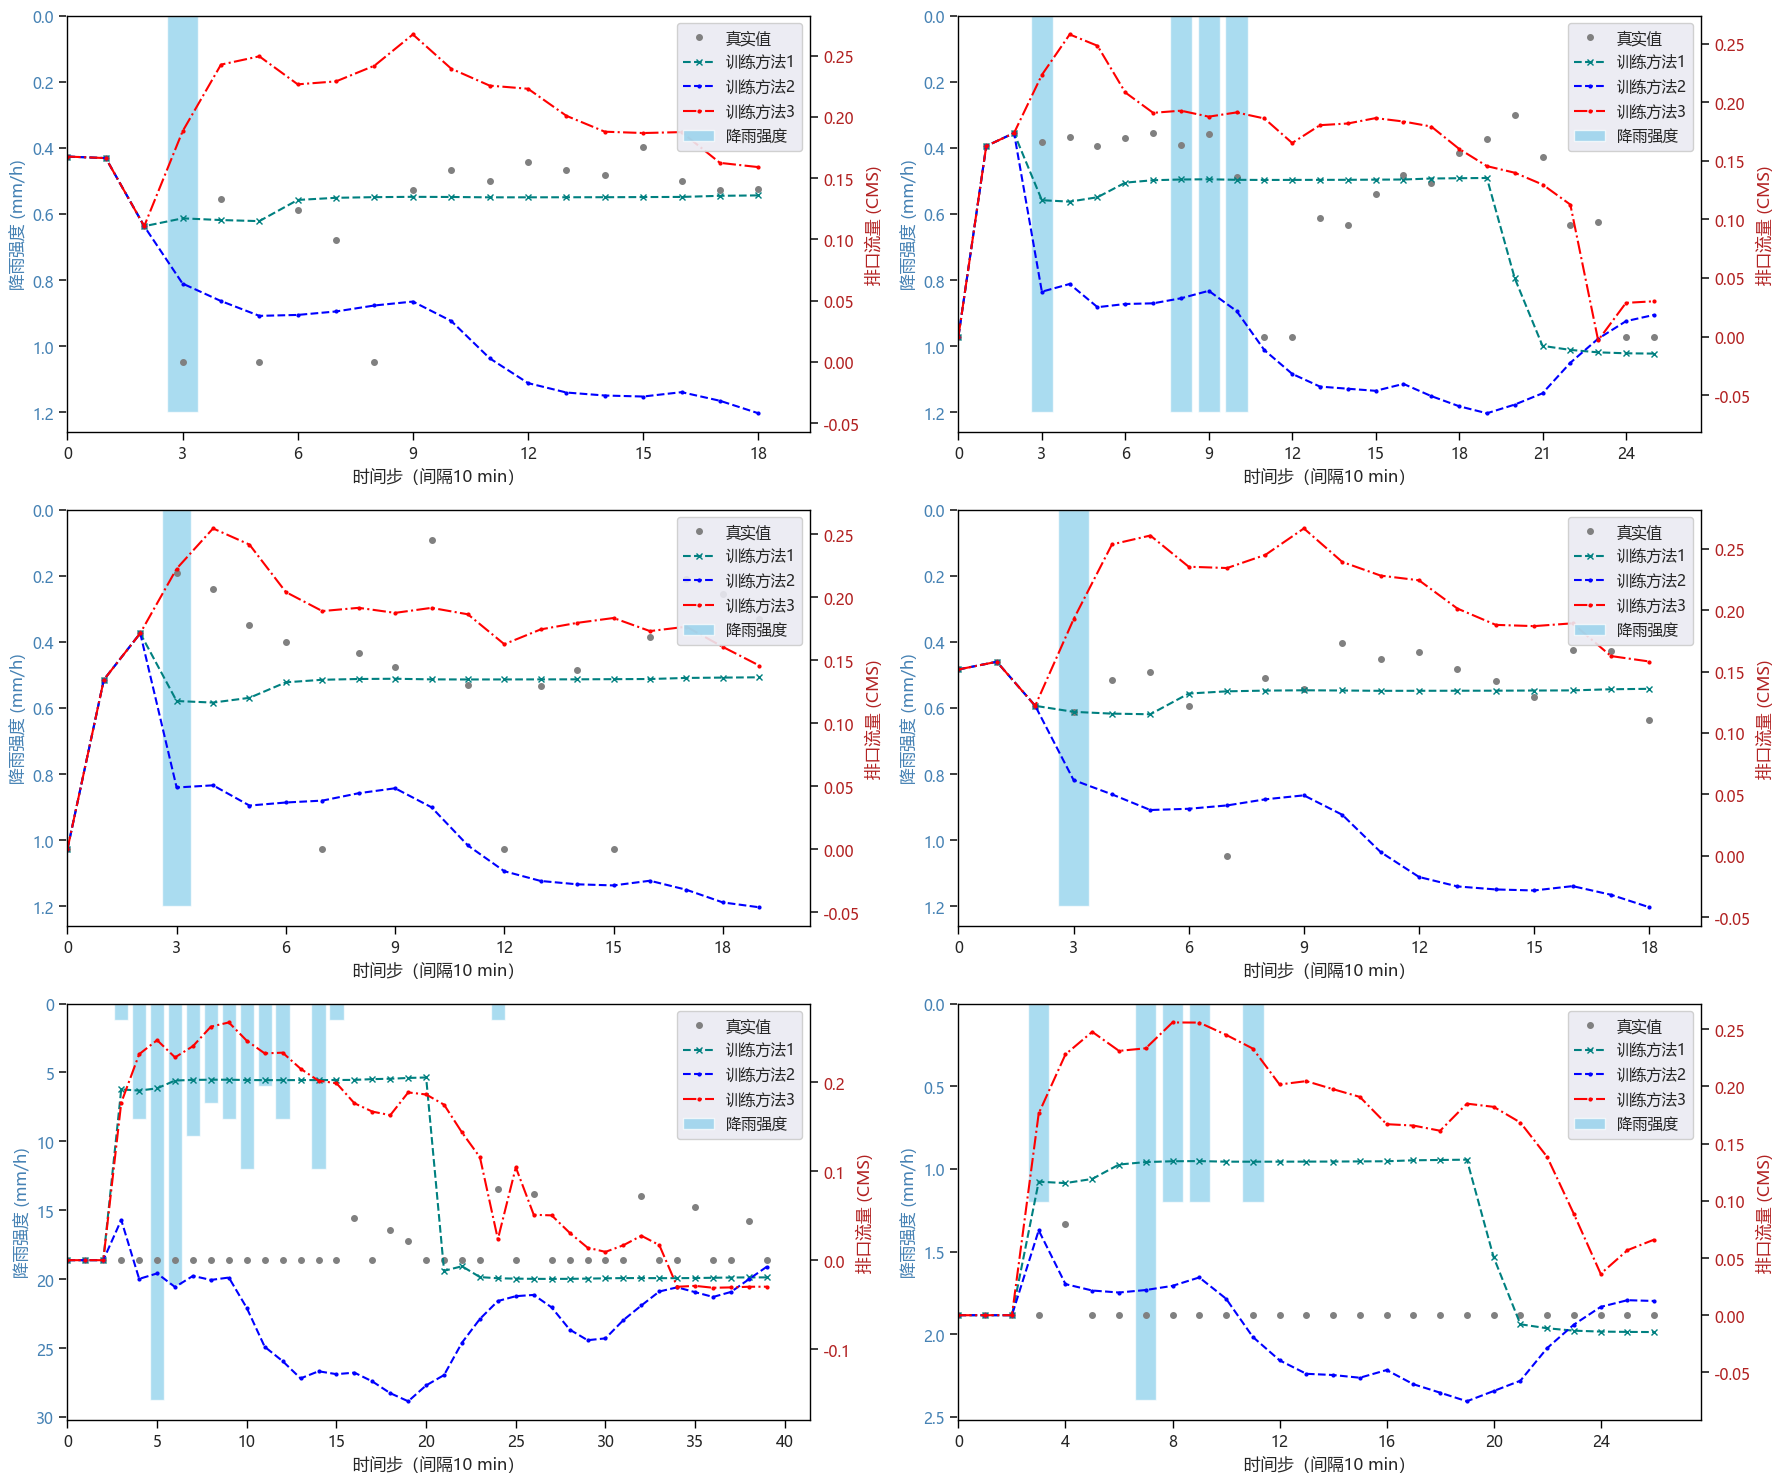

In [10]:
from utils.draw_ import plot_multiple_inference_lft
plot_multiple_inference_lft(x_seq, y_hat_TD,y_truth,'inference', pred_np1=y_hat_FT,pred_np2=y_hat_MIXED,idx_list=[16,22,27,28,38,19],
                           figures_folder='figures_MSTYLE_inference', time_step='10 min', 
                           save=True)

In [42]:
# mse = nn.MSELoss()
# # calculate loss
# mse_value = mse(y_hat, y_truth).item()
# nse_value = calc_nse_torch(y_hat, y_truth)